# NOTE: Python version >=3.7 is required

Enter sorting method:
(b)ubble
(c)ocktail
(i)nsertion
(s)election
(h)eap
c


<IPython.core.display.Javascript object>


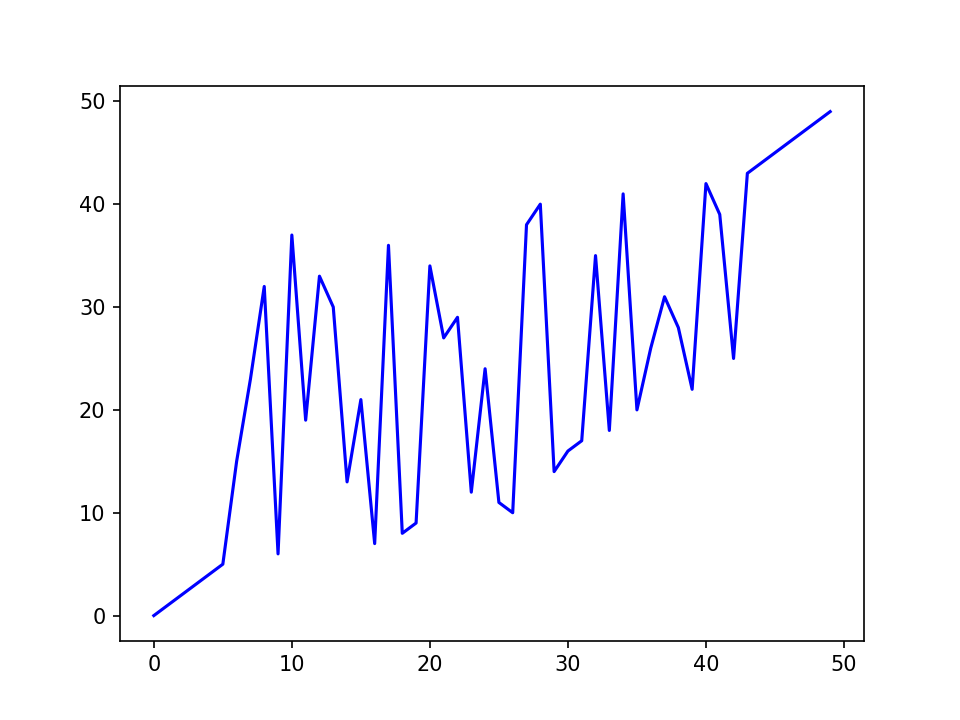

<IPython.core.display.Javascript object>


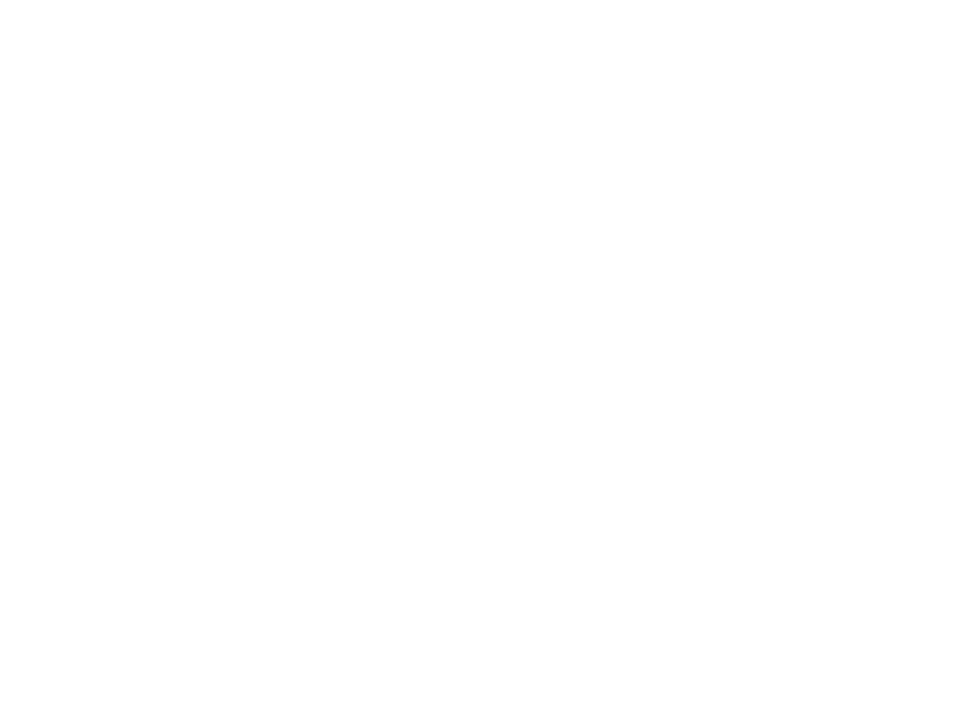

In [19]:

%matplotlib notebook
from typing import MutableSequence
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class Sort:
    def __init__(self, length: int = 100):
        self.x = np.array([i for i in range(length)])
        self.ay = [i for i in range(length)]
        self.ry = random.sample(self.ay, len(self.ay))
        self.ims =[]

class ShakerSort(Sort):
    def __init__(self):
        super().__init__(50)
    
    def visualize(self, y):
        im = plt.plot(self.x,y,'b')
        self.ims.append(im)

    def shaker_sort(self):
        left = 0
        right = len(self.ry) -1
        last = right
        while left < right:
            for j in range(right, left, -1): 
                if self.ry[j -1] > self.ry[j]:
                    self.ry[j-1],self.ry[j] = self.ry[j],self.ry[j-1]
                    self.visualize(self.ry)
                    last = j
            left = last 
            for j in range(left,right):
                if self.ry[j] > self.ry[j+1]:
                    self.ry[j],self.ry[j+1] = self.ry[j+1],self.ry[j]
                    self.visualize(self.ry)
                    last = j
            right = last
        return self.ims
    
class BubbleSort(Sort):
    def __init__(self):
        super().__init__(50)
    
    def visualize(self, y):
        im = plt.plot(self.x,y,'b')
        self.ims.append(im)

    def bubble_sort(self):
        n = len(self.ry)
        for i in range(n -1):
            for j in range(n-1, i, -1):
                if self.ry[j-1] > self.ry[j]:
                    self.ry[j -1], self.ry[j] = self.ry[j], self.ry[j-1]
                    self.visualize(self.ry)
        return self.ims
    
class InsetSort(Sort):
    def __init__(self):
        super().__init__(50)
    def visualize(self,y):
        im = plt.plot(self.x,y,'b')
        self.ims.append(im)

    def insert_sort(self):
        n = len(self.ry)
        for i in range(1,n):
            tmp = self.ry[i]
            for j in range(i -1, -1,-1): #tmpより小さい数が見つかるまでiをインクリメントする
                if tmp < self.ry[j]:
                    self.ry[j+1] = self.ry[j]
                    self.visualize(self.ry)
                else:
                    self.ry[j+1] = tmp
                    self.visualize(self.ry)
                    break
            else:
                self.ry[0] = tmp
                self.visualize(self.ry)
        return self.ims

class SelectionSort(Sort):
    def __init__(self):
        super().__init__(200)
        
    def visualize(self, y):
        im = plt.plot(self.x,y,'b')
        self.ims.append(im)

    def selection_sort(self):
        n = len(self.ry)
        for i in range(n-1):
            min = i
            for j in range(i + 1, n):
                if self.ry[j] < self.ry[min]:
                    min = j #未ソート済の配列の中から最小値を求める
            self.ry[i],self.ry[min] = self.ry[min], self.ry[i]
            self.visualize(self.ry)
        return self.ims

class HeapSort(Sort):
    def __init__(self):
        super().__init__()
        self.sorted_arr = []
    
    def visualize(self, y):
        im = plt.plot(self.x,y,'b')
        self.ims.append(im)

    #minヒープ
    def build_min_heap(self, arr):
        for i in reversed(range(len(arr)//2)):
            self.min_heapify(arr,i)

    def min_heapify(self, arr,i):
        left = i * 2 +1
        right = i *2 +2
        length = len(arr) -1 
        smallest = i
        if left <= length and arr[i] > arr[left]:
            smallest = left
        if right <= length and arr[smallest] > arr[right]:
            smallest = right
        if smallest != i:
            arr[i] , arr[smallest] = arr[smallest], arr[i]
            self.visualize(self.sorted_arr + arr)
            self.min_heapify(arr, smallest)
    sorted_arr = []
    #ヒープソート
    def heap_sort(self):
        self.build_min_heap(self.ry)
        for _ in range(len(self.ry)):
            self.ry[0], self.ry[-1] = self.ry[-1],self.ry[0]
            self.sorted_arr.append(self.ry.pop())
            self.min_heapify(self.ry,0)
        return self.ims

    
    
if __name__ == "__main__":
    method_msg = "Enter sorting method:\n(b)ubble\n(c)ocktail\n(i)nsertion\n(s)election\n(h)eap\n"
    method = input(method_msg)
    if method == 'b':
        b = BubbleSort()
        ims = b.bubble_sort()
    
    if method == 'c':
        s = ShakerSort()
        ims = s.shaker_sort()
    if method == 'i':
        i = InsetSort()
        ims = i.insert_sort()
    if method == 's':
        s = SelectionSort()
        ims = s.selection_sort()
    if method == 'h':
        h = HeapSort()
        ims = h.heap_sort()
    
    fig = plt.figure()
    ani = animation.ArtistAnimation(fig,ims,interval=1)
    plt.show()
    